<a href="https://colab.research.google.com/github/JoaoLucasYudi/JoaoLucasYudi/blob/main/Tratamento_de_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e tratemento de outliers usando IQR e Z-Score method

In [ ]:
# Libs necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weight-height.csv')

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df.shape

(10000, 3)

In [ ]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


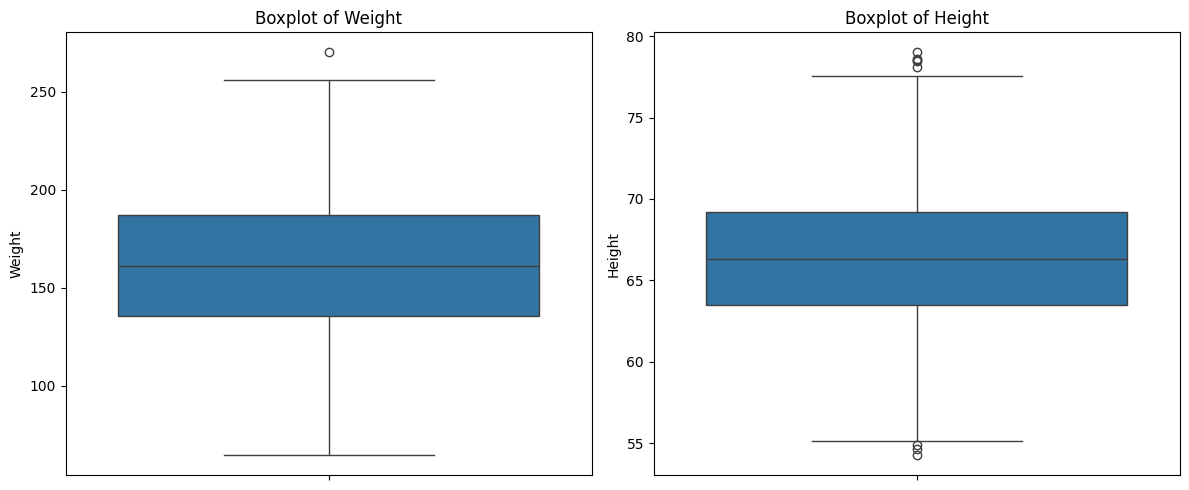

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Boxplot para Weight
sns.boxplot(data=df, y='Weight', ax=axes[0])
axes[0].set_title('Boxplot of Weight')

# Boxplot para Height
sns.boxplot(data=df, y='Height', ax=axes[1])
axes[1].set_title('Boxplot of Height')

plt.tight_layout()
plt.show()


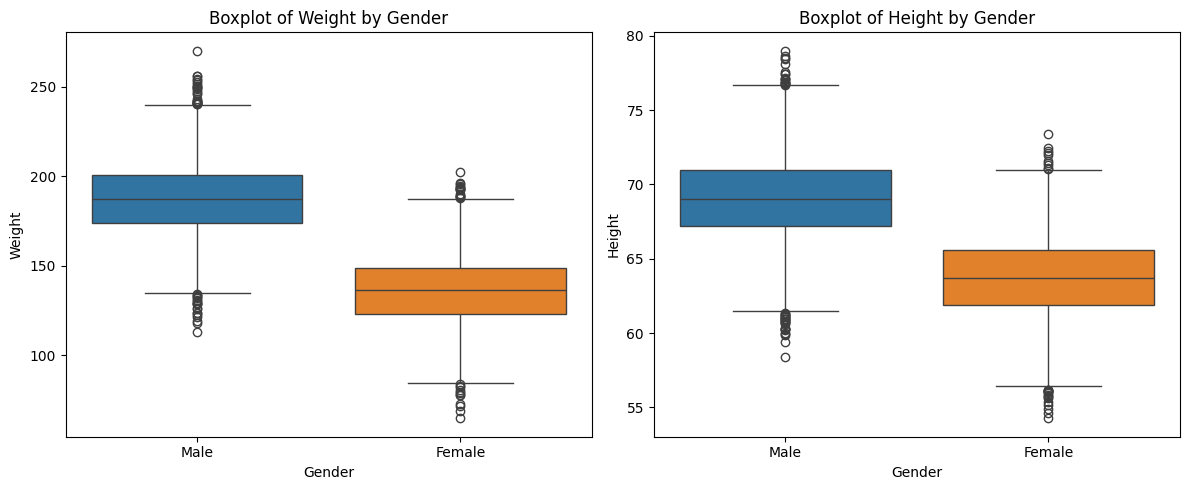

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Boxplot para Weight
sns.boxplot(data=df, y='Weight', x='Gender', hue='Gender', ax=axes[0])
axes[0].set_title('Boxplot of Weight by Gender')

# Boxplot para Height
sns.boxplot(data=df, y='Height', x='Gender', hue='Gender', ax=axes[1])
axes[1].set_title('Boxplot of Height by Gender')

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Data cleaning

In [ ]:
# Separando em dois dataframes por gênero
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [ ]:
# Listando todas as colunas numéricas
def numeric_columns(dataframe, drop_vars=[]):
  numeric_columns = []
  for col in dataframe.columns:
    if col not in drop_vars:
      if dataframe[col].dtype in ['int64', 'float64']:
        numeric_columns.append(col)
  return numeric_columns

numeric_columns = numeric_columns(df, drop_vars=['Gender'])

### IQR Method

In [ ]:
# Quantidade antes da limpeza
print(f'dataframe dos homens tem {len(df_male)} linhas')
print(f'dataframe das mulheres tem {len(df_female)} linhas')

dataframe dos homens tem 5000 linhas
dataframe das mulheres tem 5000 linhas


In [ ]:
def iqr_outliers(dataframe, numeric_columns):
  for col in dataframe[numeric_columns]:
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_cleaned = dataframe[(dataframe[col] <= lower_bound) | (dataframe[col] >= upper_bound)]

    return df_cleaned

df_male_cleaned_iqr = iqr_outliers(df_male, numeric_columns)
df_female_cleaned_iqr = iqr_outliers(df_female, numeric_columns)

In [ ]:
# Quantidade depois da limpeza
print(f'{len(df_male_cleaned_iqr)} linhas')
print(f'{len(df_female_cleaned_iqr)} linhas')

46 linhas
27 linhas


In [ ]:
def plt_boxplot(dataframe, numeric_columns):
  for c in dataframe[numeric_columns].columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=dataframe, x=c)
    plt.title(f'Boxplot of {c}')
    plt.show()

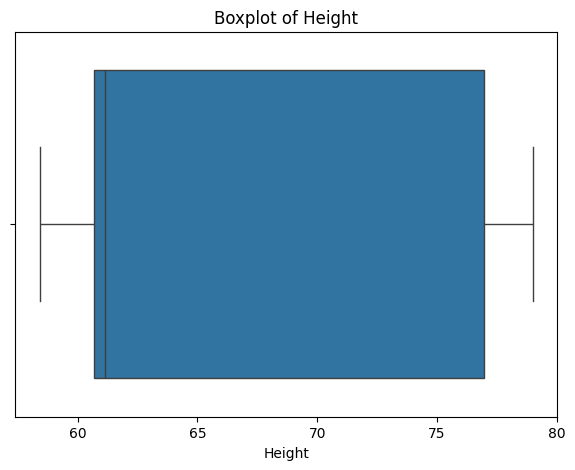

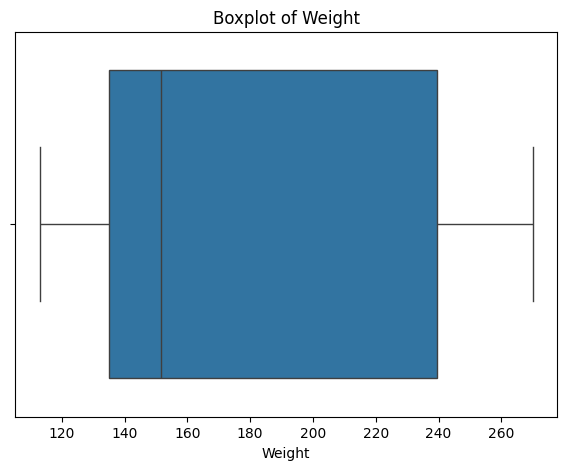

In [ ]:
plt_boxplot(df_male_cleaned_iqr, numeric_columns)

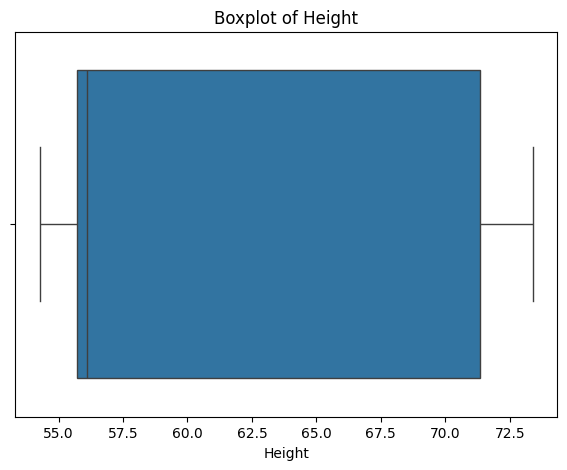

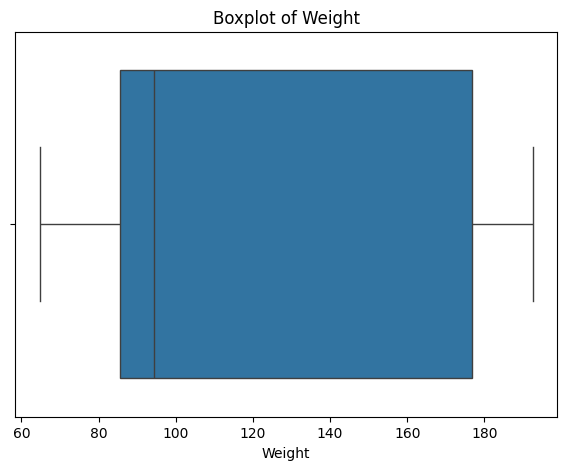

In [ ]:
plt_boxplot(df_female_cleaned_iqr, numeric_columns)

### Z-SCORE Method

In [ ]:
# Calculate Z-scores

def zscore_outliers(dataframe, numeric_columns):
    # Calcula os z-scores apenas das colunas numéricas
    z_scores = np.abs(zscore(dataframe[numeric_columns]))

    # Cria uma máscara booleana para manter linhas onde todos os z-scores são < 3
    mask = (z_scores < 3).all(axis=1)

    # Aplica a máscara no DataFrame original
    df_cleaned = dataframe[mask]

    return df_cleaned

df_male_cleaned_zscore = zscore_outliers(df_male, numeric_columns)
df_female_cleaned_zscore = zscore_outliers(df_female, numeric_columns)

In [ ]:
# Quantidade depois da limpeza
print(f'{len(df_male_cleaned_zscore)} linhas')
print(f'{len(df_female_cleaned_zscore)} linhas')

4970 linhas
4980 linhas


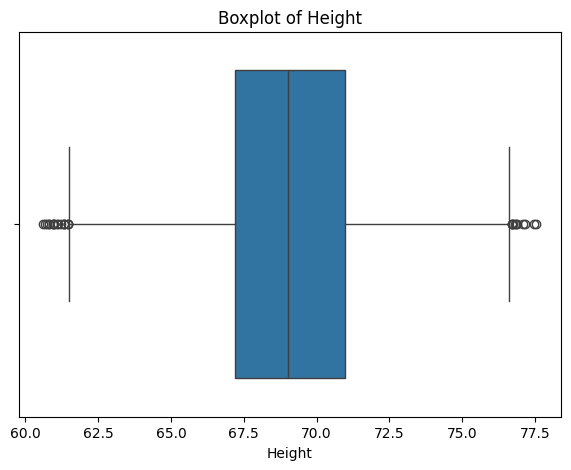

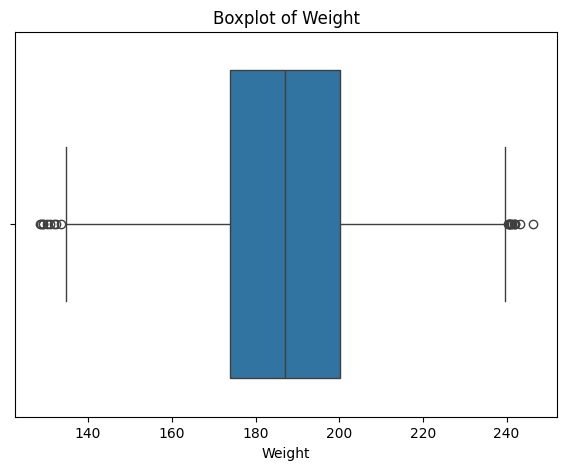

In [ ]:
plt_boxplot(df_male_cleaned_zscore, numeric_columns)